## Now we will load DESeq2 and perform PCA and differential expression

In [1]:
library("DESeq2")
library("ggplot2")
library("RColorBrewer")


Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min


Attaching package: ‘S4Vectors’

The followin

In [6]:
counts <- read.csv('/home/ucsd-train48/projects/featureCounts/counts_for_deseq2.csv', header=TRUE, row.names=1)
counts$Length <- NULL
head(counts)


,X.home.ucsd.train48.scratch.star_alignment.DMSO_1_ATCACGAligned.sortedByCoord.out.bam,X.home.ucsd.train48.scratch.star_alignment.DMSO_2_CGATGTAligned.sortedByCoord.out.bam,X.home.ucsd.train48.scratch.star_alignment.DTP_1_CAGATCAligned.sortedByCoord.out.bam,X.home.ucsd.train48.scratch.star_alignment.DTP_2_CCGTCCAligned.sortedByCoord.out.bam,X.home.ucsd.train48.scratch.star_alignment.DTP_3_GTGAAAAligned.sortedByCoord.out.bam
ENSG00000223972.4,0,0,0,0,0
ENSG00000227232.4,16,19,43,38,61
ENSG00000243485.2,0,0,0,0,0
ENSG00000237613.2,0,0,0,0,0
ENSG00000268020.2,0,0,0,0,0
ENSG00000240361.1,0,0,0,0,0


In [7]:
condition <- factor(c("DMSO","DMSO","DTP","DTP","DTP"))

In [10]:
dds <- DESeqDataSetFromMatrix(countData = counts, colData = DataFrame(condition), design = ~ condition)

In [11]:
dds <- dds[ rowSums(counts(dds)) > 4, ]

In [12]:
dds <- DESeq(dds)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


In [13]:
res <- results(dds)
write.csv(as.data.frame(res), file="/home/ucsd-train48/projects/featureCounts/differential_expression.csv")
summary(res)



out of 27525 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 6193, 22%
LFC < 0 (down)     : 6736, 24%
outliers [1]       : 0, 0%
low counts [2]     : 2668, 9.7%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



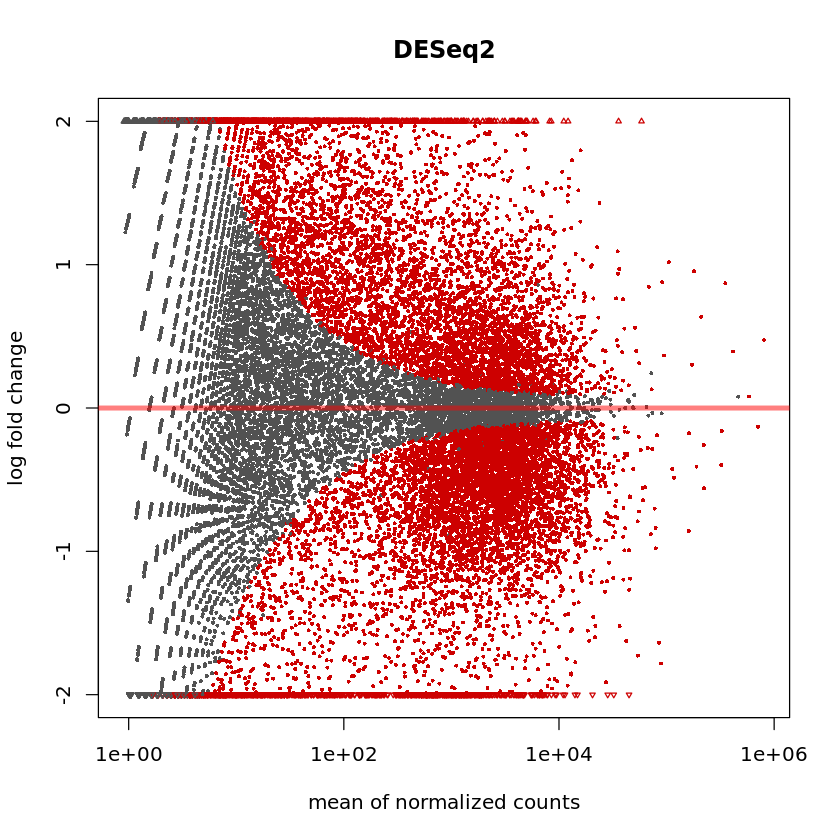

In [14]:
plotMA(res, main="DESeq2", ylim=c(-2,2))


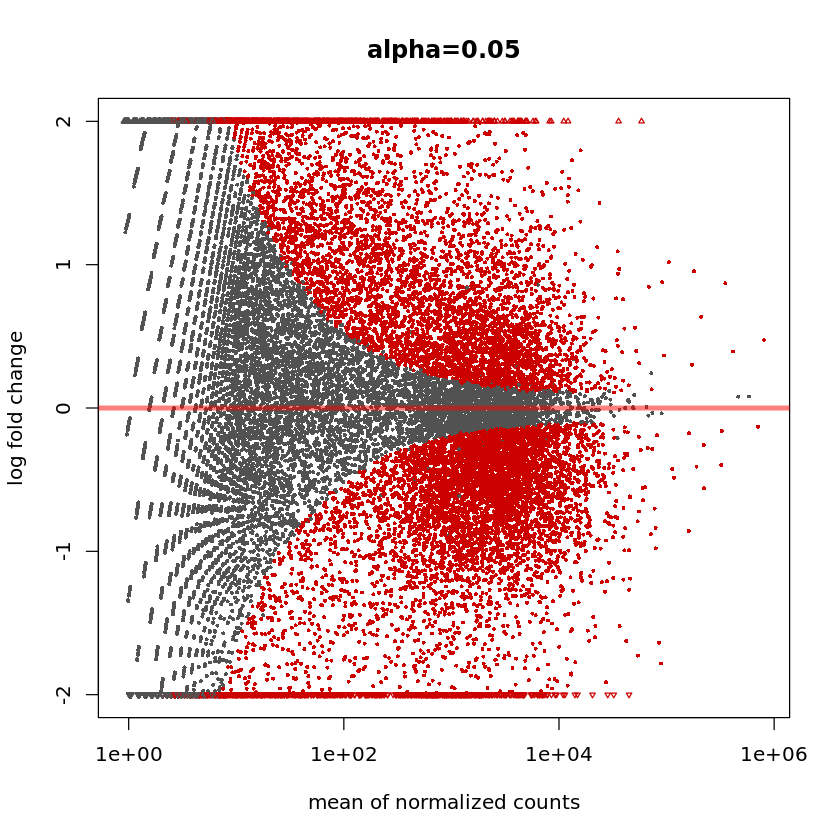

In [15]:
res05 <- results(dds, alpha=0.05)
plotMA(res05, main="alpha=0.05", ylim=c(-2,2))


$y
[1] "PC2: 0% variance"

attr(,"class")
[1] "labels"

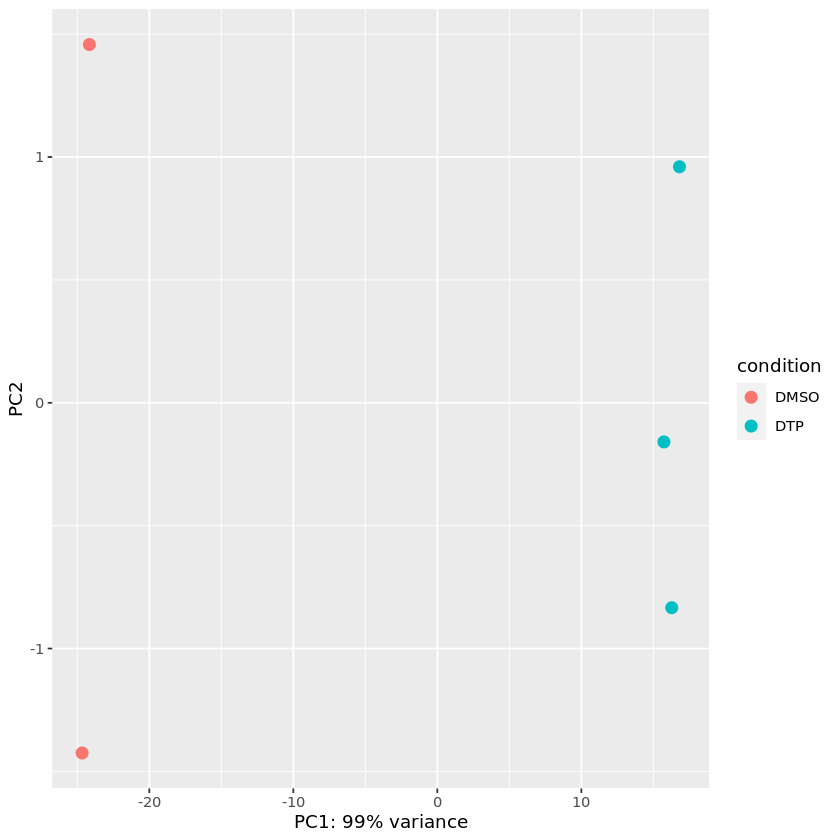

In [16]:
rld <- rlog(dds) 
vsd <- varianceStabilizingTransformation(dds)
data <- plotPCA(rld, intgroup="condition", returnData=TRUE) 
percentVar <- round(100 * attr(data, "percentVar")) 
ggplot(data, aes(PC1, PC2, color=condition)) + geom_point(size=3) + xlab(paste0("PC1: ",percentVar[1],"% variance")) 
ylab(paste0("PC2: ",percentVar[2],"% variance"))


Warning message in plot.window(...):
“"clustering_distance_rows" is not a graphical parameter”Warning message in plot.window(...):
“"clustering_distance_cols" is not a graphical parameter”Warning message in plot.xy(xy, type, ...):
“"clustering_distance_rows" is not a graphical parameter”Warning message in plot.xy(xy, type, ...):
“"clustering_distance_cols" is not a graphical parameter”Warning message in title(...):
“"clustering_distance_rows" is not a graphical parameter”Warning message in title(...):
“"clustering_distance_cols" is not a graphical parameter”

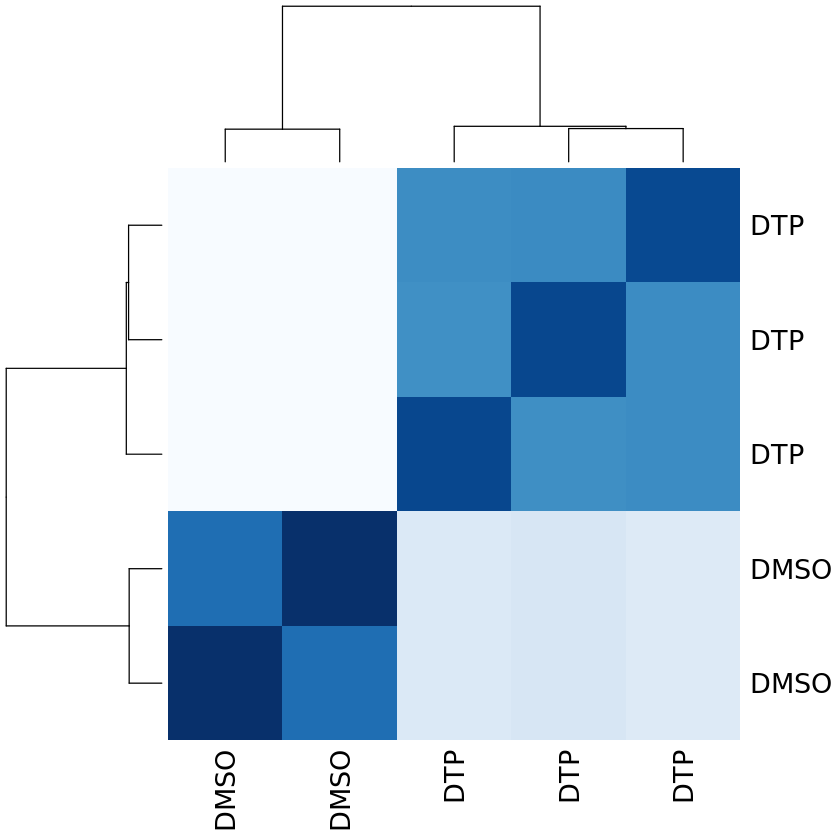

In [17]:
sampleDists <- dist(t(assay(rld)))
sampleDistMatrix <- as.matrix(sampleDists)
rownames(sampleDistMatrix) <- paste(rld$condition)
colnames(sampleDistMatrix) <- paste(rld$condition)
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
heatmap(sampleDistMatrix, clustering_distance_rows=sampleDists, clustering_distance_cols=sampleDists, col=colors)


In [ ]:
)